In [1]:
import pandas as pd
import numpy as np
import matplotlib
"https://www.youtube.com/watch?v=aLOQD66Sj0g"
"https://github.com/data-students/datathon2025-challenges/blob/main/Schneider%20Electric/statament.pdf"


'https://github.com/data-students/datathon2025-challenges/blob/main/Schneider%20Electric/statament.pdf'

In [2]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35899 entries, 0 to 35898
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          35899 non-null  int64  
 1   product_A_sold_in_the_past  35899 non-null  float64
 2   product_B_sold_in_the_past  35899 non-null  float64
 3   product_A_recommended       35899 non-null  float64
 4   product_A                   35899 non-null  float64
 5   product_C                   35899 non-null  float64
 6   product_D                   35899 non-null  float64
 7   cust_hitrate                35899 non-null  float64
 8   cust_interactions           35899 non-null  float64
 9   cust_contracts              35899 non-null  float64
 10  opp_month                   35899 non-null  float64
 11  opp_old                     35899 non-null  float64
 12  competitor_Z                35899 non-null  int64  
 13  competitor_X                358

In [3]:
df['target_variable'].value_counts()

target_variable
0    19009
1    16890
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='target_variable')
y = df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)



In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

x = 
estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(
                          objective="binary:logistic",
                          )) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

,steps,"[('encoder', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,None
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20


In [57]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0), 
    'random_state': Integer(1, 42)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, random_state=8, scoring='f1') 
# in reality, you may consider setting cv and n_iter to higher values

In [58]:
opt.fit(X_train, y_train)

ValueError: Invalid parameter 'random_state' for estimator Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=True, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [47]:
opt.best_estimator_

,steps,"[('encoder', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,[]
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20


In [48]:
opt.best_score_

np.float64(0.824638434641952)

In [49]:
opt.score(X_test, y_test)

0.8459698604368653

In [50]:
opt.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], shape=(10770,))

In [51]:
opt.predict_proba(X_test)

array([[0.6445708 , 0.3554292 ],
       [0.7008853 , 0.29911473],
       [0.14714193, 0.85285807],
       ...,
       [0.93467766, 0.06532232],
       [0.9863497 , 0.01365027],
       [0.98694146, 0.01305856]], shape=(10770, 2), dtype=float32)

In [52]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.5, colsample_bynode=0.5, colsample_bytree=1.0,
                device=None, early_stopping_rounds=None, enable_categorical=True,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=0.0, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=1.0, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

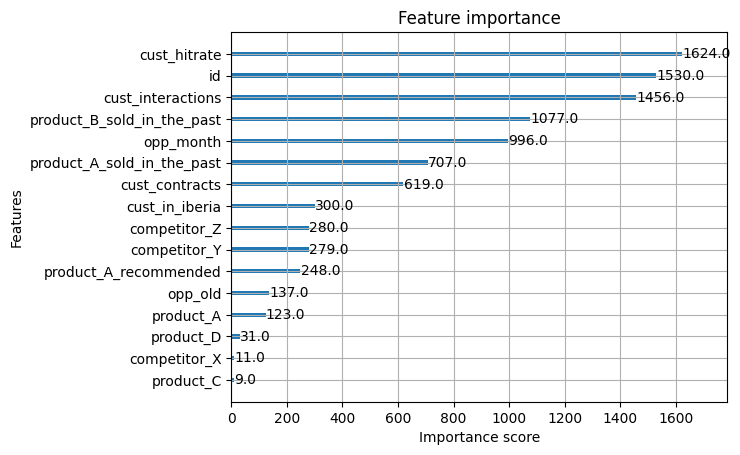

In [53]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

In [54]:
from sklearn.metrics import f1_score, classification_report

y_pred_train = opt.predict(X_train)
y_pred_test = opt.predict(X_test)

print("F1 (train):", f1_score(y_train, y_pred_train))
print("F1 (test):", f1_score(y_test, y_pred_test))

# Optional: full report
print("\nClassification report (test):")
print(classification_report(y_test, y_pred_test))

# Optional: tune threshold for better F1
import numpy as np
p_train = opt.predict_proba(X_train)[:, 1]
p_test = opt.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.05, 0.95, 19)

best_t_train = max(thresholds, key=lambda t: f1_score(y_train, (p_train >= t)))
best_t_test = max(thresholds, key=lambda t: f1_score(y_test, (p_test >= t)))

print("\nBest threshold (train):", best_t_train, "F1:", f1_score(y_train, (p_train >= best_t_train)))
print("Best threshold (test):", best_t_test, "F1:", f1_score(y_test, (p_test >= best_t_test)))

F1 (train): 0.8988887018016501
F1 (test): 0.7498518079430943

Classification report (test):
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5703
           1       0.75      0.75      0.75      5067

    accuracy                           0.76     10770
   macro avg       0.76      0.76      0.76     10770
weighted avg       0.76      0.76      0.76     10770


Best threshold (train): 0.44999999999999996 F1: 0.8990014732362088
Best threshold (test): 0.3 F1: 0.7681406863582039


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
)


DATA_PATH = "dataset.csv"          # Change if needed
TARGET_COL = "target_variable"     # TODO: set your binary target column name
ID_COLS = ["id"]                   # e.g., ["id"] if you have identifier columns to drop
RANDOM_STATE = 42
N_ESTIMATORS = 2000
LEARNING_RATE = 1.0
EARLY_STOPPING_ROUNDS = 100

# Load
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset with shape: {df.shape}")
print("Columns:", list(df.columns))

if TARGET_COL not in df.columns:
    raise ValueError(f"TARGET_COL='{TARGET_COL}' not found in dataframe. Please set it to your binary label column.")

# Separate features/target, drop id columns if any
y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL] + [c for c in ID_COLS if c in df.columns])

# Ensure binary target
unique_y = sorted(pd.Series(y).dropna().unique().tolist())
if len(unique_y) != 2:
    raise ValueError(f"Target must be binary. Found unique values: {unique_y}")

# Categorical handling: convert object columns to pandas 'category' for native categorical splits
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
for c in cat_cols:
    X[c] = X[c].astype("category")

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

# Class imbalance handling: scale_pos_weight = neg/pos if imbalanced
pos_rate = float(np.mean(y_train))
spw = None
if min(pos_rate, 1 - pos_rate) < 0.35 and pos_rate > 0:
    spw = (1 - pos_rate) / pos_rate
print(f"Train positive rate: {pos_rate:.3f} | scale_pos_weight={spw}")

# Model
model = XGBClassifier(
    n_estimators=N_ESTIMATORS,
    learning_rate=LEARNING_RATE,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=RANDOM_STATE,
    objective="binary:logistic",
    tree_method="hist",
    enable_categorical=True,   # requires pandas 'category' dtype
    eval_metric="auc",
    n_jobs=-1,
    scale_pos_weight=spw if spw is not None else 1.0,
    verbosity=0,
)

Loaded dataset with shape: (35899, 17)
Columns: ['id', 'product_A_sold_in_the_past', 'product_B_sold_in_the_past', 'product_A_recommended', 'product_A', 'product_C', 'product_D', 'cust_hitrate', 'cust_interactions', 'cust_contracts', 'opp_month', 'opp_old', 'competitor_Z', 'competitor_X', 'competitor_Y', 'cust_in_iberia', 'target_variable']
Train positive rate: 0.470 | scale_pos_weight=None


In [72]:
# Fit with early stopping
model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train)],
    verbose=False,
)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,'auc'


In [73]:

# Predictions
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# Metrics
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# F1-scores (final results)
f1_bin = f1_score(y_test, y_pred, average="binary")
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

# Best-threshold F1 (optional)
prec, rec, thr = precision_recall_curve(y_test, y_prob)
f1_per_thr = (2 * prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = int(np.argmax(f1_per_thr)) if len(f1_per_thr) else 0
best_thr = float(thr[best_idx]) if len(thr) else 0.5
best_f1 = float(f1_per_thr[best_idx]) if len(f1_per_thr) else f1_bin

print(f"ROC AUC: {roc_auc:.4f} | PR AUC: {pr_auc:.4f}")
print(f"F1 (binary @0.5): {f1_bin:.4f} | F1 (macro): {f1_macro:.4f} | F1 (weighted): {f1_weighted:.4f}")
print(f"Best F1: {best_f1:.4f} at threshold={best_thr:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


ROC AUC: 0.8876 | PR AUC: 0.8692
F1 (binary @0.5): 0.7940 | F1 (macro): 0.8055 | F1 (weighted): 0.8062
Best F1: 0.8032 at threshold=0.4396

Classification report:
               precision    recall  f1-score   support

           0     0.8170    0.8171    0.8170      5703
           1     0.7941    0.7940    0.7940      5067

    accuracy                         0.8062     10770
   macro avg     0.8055    0.8055    0.8055     10770
weighted avg     0.8062    0.8062    0.8062     10770

Confusion matrix:
 [[4660 1043]
 [1044 4023]]
